# EDA for Reproductive Rights / Gender Equity / Abortion Rights Data Sets

### General Packages/Libraries Imports

In [3]:
### Warning Handling
import warnings

### Data Manipulation
import pandas as pd
import numpy as np

### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Machine Learning Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Machine Learning Model Development and Testing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

### Machine Learning Classification Modeling
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import lightgbm as lgb

### Machine Learning Regression Modeling
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

### Deep Learning
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam

## Data Set 1: Gender Inequality Index 

**Available at: https://www.kaggle.com/datasets/gianinamariapetrascu/gender-inequality-index**

**Documentation: https://hdr.undp.org/data-center/thematic-composite-indices/gender-inequality-index#/indicies/GII**

In [4]:
### Reading in the data set
df1 = pd.read_csv('Data/Gender_Inequality_Index.csv')

In [5]:
### Checking dimensions of the dataframe
df1.shape

(195, 11)

In [6]:
### Getting an overview of the data set (looking for missing values)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                195 non-null    object 
 1   Human_development      191 non-null    object 
 2   GII                    170 non-null    float64
 3   Rank                   170 non-null    float64
 4   Maternal_mortality     184 non-null    float64
 5   Adolescent_birth_rate  195 non-null    float64
 6   Seats_parliament       193 non-null    float64
 7   F_secondary_educ       177 non-null    float64
 8   M_secondary_educ       177 non-null    float64
 9   F_Labour_force         180 non-null    float64
 10  M_Labour_force         180 non-null    float64
dtypes: float64(9), object(2)
memory usage: 16.9+ KB


In [7]:
### Columns with missing data
    # GII: 25 missing values (this is the measure of equality; lower == better)
    # Rank: 25 missing values
    # Maternal_mortality: 11 missing values
    # Seats_parliment: 2 missing values
    # F_secondary_educ: 18 missing values
    # M_secondary_educ: 18 missing values
    # F_Labour_force: 15 missing values
    # M_Labour_force: 15 missing values

In [8]:
### Converting F_secondary_educ and M_secondary_educ to percentages
df1['f_educ_prop'] = [x / 100  for x in df1.F_secondary_educ]
df1['m_educ_prop'] = [x / 100 for x in df1.M_secondary_educ]
df1['f_parl_prop'] = [x / 100 for x in df1.Seats_parliament]

In [9]:
df1.Human_development.value_counts()

Very high    66
High         49
Medium       44
Low          32
Name: Human_development, dtype: int64

In [10]:
df1.head()

,Country,Human_development,GII,Rank,Maternal_mortality,Adolescent_birth_rate,Seats_parliament,F_secondary_educ,M_secondary_educ,F_Labour_force,M_Labour_force,f_educ_prop,m_educ_prop,f_parl_prop
0,Switzerland,Very high,0.018,3.0,5.0,2.2,39.8,96.9,97.5,61.7,72.7,0.969,0.975,0.398
1,Norway,Very high,0.016,2.0,2.0,2.3,45.0,99.1,99.3,60.3,72.0,0.991,0.993,0.450
2,Iceland,Very high,0.043,8.0,4.0,5.4,47.6,99.8,99.7,61.7,70.5,0.998,0.997,0.476
3,Hong Kong,Very high,NaN,NaN,NaN,1.6,NaN,77.1,83.4,53.5,65.8,0.771,0.834,NaN
4,Australia,Very high,0.073,19.0,6.0,8.1,37.9,94.6,94.4,61.1,70.5,0.946,0.944,0.379


In [11]:
### Interactive Plot of Percentage of women with secondary education vs. maternal mortality
px.scatter(df1, 
           y = 'Maternal_mortality',
           x = 'f_educ_prop',
           hover_data = ['Country'],
           color = 'Human_development')

## Data Set 2: Driving Time to Abortion Clinic in US

**Available at: https://data.world/the-pudding/driving-times-to-abortion-clinics**

In [12]:
df2 = pd.read_csv('Data/cities.csv')

In [13]:
df2.head()

,id,city,state,population,latitude,longitude,gestation_8_duration,gestation_8_duration_closed,gestation_12_duration,gestation_12_duration_closed,gestation_16_duration,gestation_16_duration_closed,gestation_20_duration,gestation_20_duration_closed
0,new-york-new-york,New York,New York,8550405,40.712784,-74.005941,0,0,0,0,0,0,0,0
1,los-angeles-california,Los Angeles,California,3971883,34.052234,-118.243685,0,0,0,0,0,0,0,0
2,chicago-illinois,Chicago,Illinois,2720546,41.878114,-87.629798,0,0,0,0,0,0,0,0
3,houston-texas,Houston,Texas,2296224,29.760427,-95.369803,0,0,0,0,0,0,0,4
4,philadelphia-pennsylvania,Philadelphia,Pennsylvania,1567442,39.952584,-75.165222,0,0,0,0,0,0,0,0


## Data Set 3: Pregnancy, Birth, & Abortion Rates in US

**Available at: https://data.world/vizwiz/pregnancy-birth-abortion-rates-in-the-united-states**

In [14]:
df3 = pd.read_csv('Data/State Pregnancy-Birth-Abortion Rates.csv')

In [15]:
df3.shape

(23172, 5)

In [16]:
tmp = df3.groupby('Year').mean().reset_index()
tmp.columns

Index(['Year', 'Events per 1,000 women'], dtype='object')

<AxesSubplot:xlabel='Year', ylabel='Events per 1,000 women'>

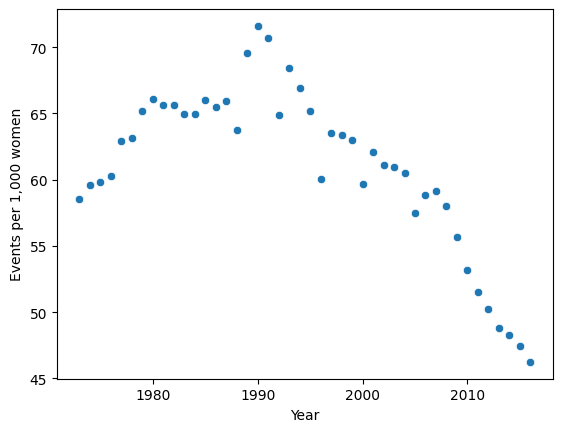

In [17]:
sns.scatterplot(data = tmp, x = 'Year', y = 'Events per 1,000 women')

## Data Set 4: Global Abortion Incidence 

**Available at: https://osf.io/6t4eh**

In [18]:
df4 = pd.read_csv('Data/Global Abortion Incidence Dataset.csv')

In [19]:
tmp = sorted(df4.numberofabortions)
tmp[-1]

1609000.0